# 14716. 현수막
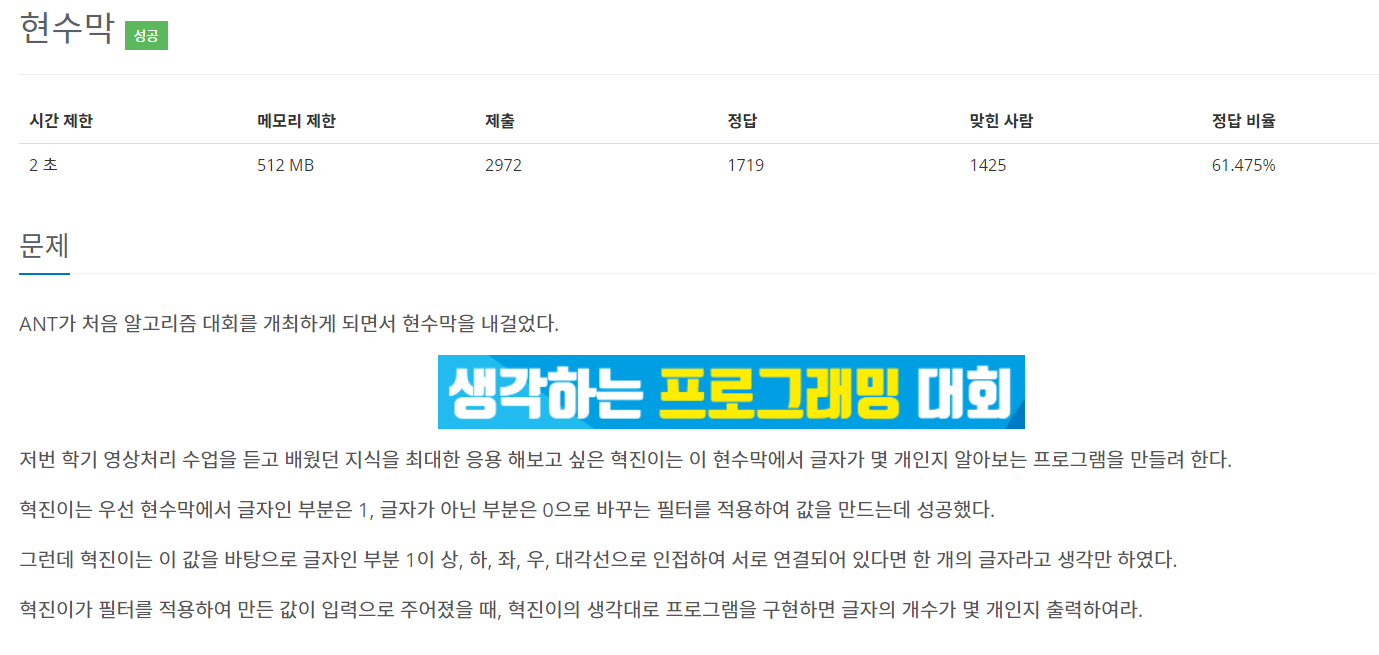
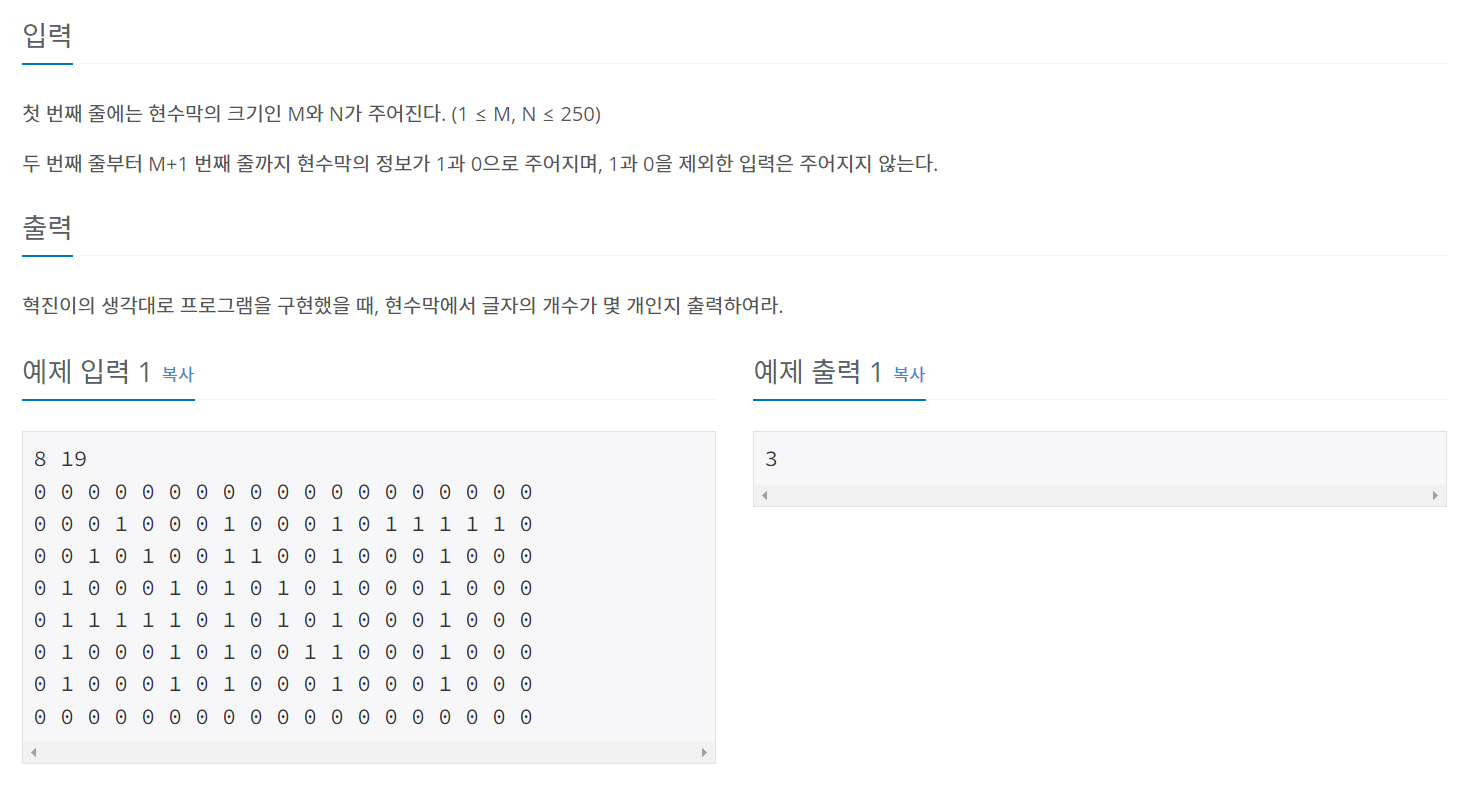
### 핵심 아이디어
- `핵심 포인트1`: 기존의 상하좌우 + 대각선까지 생각해줘야함
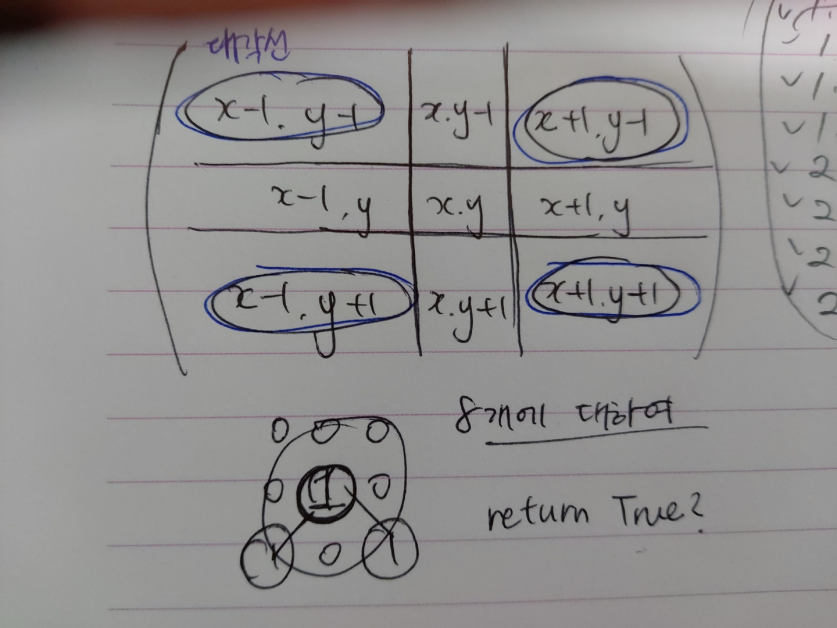
- `핵심 포인트2`: 그래프를 탐색하면서 1을 만나면 주위에 있는 8개의 숫자에 대하여 1인지 확인한다.
- `핵심 포인트3`: 방문한 것을 어떻게 표시할까? 1을 0으로 바꿔준다면 중복해서 체크할 일이 없어진다.
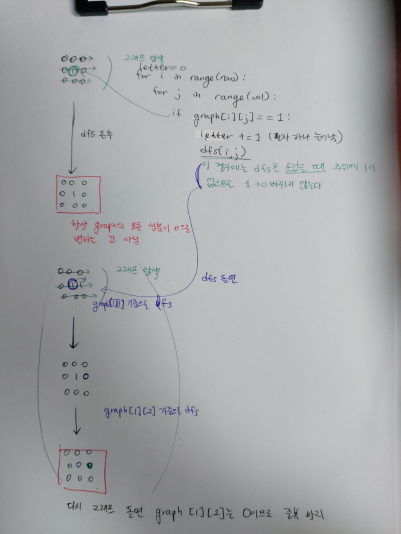
- `핵심 포인트3`: 기존의 상하좌우 + 대각선까지 생각해줘야함
- `코드 구현`
>dx = [-1, 1, 0, 0] + `[-1, 1, -1, 1]`   
dy = [0, 0, -1, 1] + `[-1, -1, 1, 1]`
    
## DFS 이용한 풀이 > 실패

In [ ]:
row, col = map(int, input().split())

graph = []
for i in range(row):
    graph.append(list(map(int, input().split())))
    
def dfs(x, y):
    # 이동할 네 방향 정의(상, 하, 좌, 우)+ (대각선)
    dx = [-1, 1, 0, 0] + [-1, 1, -1, 1]
    dy = [0, 0, -1, 1] + [-1, -1, 1, 1]
    
    for i in range(8):
        nx = x + dx[i]
        ny = y + dy[i]
        # 범위를 벗어나지 않으면서 값이 1이라면
        if -1 < nx < row or -1 < ny < row and graph[nx][ny] == 1:
            # 노드 방문 처리
            graph[nx][ny] = 0
            dfs(nx, ny)
            print(graph)

letter = 0
for i in range(row):
    for j in range(col):
        if graph[i][j] == 1:
            letter += 1
            dfs(i, j)
            
print(letter)

8 19
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0
0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0
0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


- `에러`: 런타임 에러 (NameError)
- `실패 이유`: 백준은  Python3 의 최대 재귀깊이를 1000으로 정해놨기 때문이다.
- `해결 코드`
> import sys   
sys.setrecursionlimit(1000000)

## 실패

In [ ]:
# 새로 추가한 부분
import sys
sys.setrecursionlimit(1000000)

row, col = map(int, input().split())

graph = []
for i in range(row):
    graph.append(list(map(int, input().split())))
    
def dfs(x, y):
    # 이동할 네 방향 정의(상, 하, 좌, 우)+ (대각선)
    dx = [-1, 1, 0, 0] + [-1, 1, -1, 1]
    dy = [0, 0, -1, 1] + [-1, -1, 1, 1]
    
    for i in range(8):
        nx = x + dx[i]
        ny = y + dy[i]
        # 범위를 벗어나지 않으면서 값이 1이라면
        if -1 < nx < row or -1 < ny < row and graph[nx][ny] == 1:
            # 노드 방문 처리
            graph[nx][ny] = 0
            dfs(nx, ny)
            print(graph)

letter = 0
for i in range(row):
    for j in range(col):
        if graph[i][j] == 1:
            letter += 1
            dfs(i, j)
            
print(letter)

8 19
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0
0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0
0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


- `에러`: 메모리 초과
- `실패 이유`: 재귀 함수 안에 for문을 돌면 메모리 안에 저장해놓은 채 8개의 방향을 살펴야하므로 가까운 노드부터 탐색하고 있다. 즉, BFS 탐색을 재귀 함수로 이용한 것이다.
- `알게 된 것`: 
    - 가까운 노드부터 탐색하고자 할 때 재귀함수를 사용하지 않고 큐를 사용하는 이유는 메모리상의 이유라는 것을 알 수 있다. 
    - BFS도 코드로는 재귀함수를 이용해서 짜줄 수 있지만 탐색의 범위가 상하좌우 > 상하좌우+대각선과 같이 복잡할 경우 한 번에 저장해놓아야할 정보가 너무 많아진다. 
    - 즉, 재귀함수는 사실상 스택의 원리를 사용해주는 것이다. 
    - 그렇다면 recursion을 많이 돌아야하는 상황에 메모리 부족이 발생한다.
    - 따라서, 한번 가까운 노드부터 탐색할 때 한번의 bfs 함수를 돌 때 큐를 통해 정보를 담았다가 비우는 과정이 필요하다.
    - 탐색의 범위가 상하좌우에 한정되었을 때는 어쩌면 위와 같은 코드로도 돌아갈지도 모른다. 다음에 확인해보자.
-`수정 부분`: dfs안에 for문 도는 대신, 8개의 방향마다 재귀함수를 호출하는 방식으로 수정한다.
```python
if graph[x][y] == 1:   
        graph[x][y] = 0
        # 해당 노드 방문 처리
        graph[x][y] = 0
        # 상, 하, 좌, 우의 위치도 모두 재귀적으로 호출
        dfs(x-1, y)
        dfs(x, y-1)
        dfs(x+1, y)
        dfs(x, y+1)
        # 대각선도 확인
        dfs(x-1, y-1)
        dfs(x+1, y-1)
        dfs(x-1, y+1)
        dfs(x+1, y+1)
```

## 성공 1

In [8]:
import sys
sys.setrecursionlimit(1000000)

# row, col 입력받기
row, col = map(int, input().split())

# graph 입력받기
graph = []
for i in range(row):
    graph.append(list(map(int, input().split())))
    
def dfs(x, y):
    # 주어진 범위를 벗어나는 경우에는 즉시 종료
    if x <= -1 or x >= row or y <= -1 or y >= col:
        return
    # 현재 노드를 아직 방문하지 않았다면
    if graph[x][y] == 1:
        # 해당 노드 방문 처리
        graph[x][y] = 0
        # 상, 하, 좌, 우의 위치도 모두 재귀적으로 호출
        dfs(x-1, y)
        dfs(x, y-1)
        dfs(x+1, y)
        dfs(x, y+1)
        # 대각선도 확인
        dfs(x-1, y-1)
        dfs(x+1, y-1)
        dfs(x-1, y+1)
        dfs(x+1, y+1)

# 모든 위치에 대하여 방문하기
letter = 0
for i in range(row):
    for j in range(col):
        if graph[i][j] == 1:
            letter += 1
            dfs(i, j)
            
print(letter)

8 19
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0
0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0
0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
3


### 다르게?
```python
if graph[i][j] == 1:
    letter += 1
    dfs(i, j)
```
- dfs에서 연결된 1 노드를 0으로 바꿔주는 기존의 역할 + 판별의 역할까지 하도록 하려면?
```python
if dfs(i, j) == True:
    letter += 1
```
-`구현`: boolean 값을 return 받도록 수정한다.
> - 주어진 범위 벗어나는 경우: return False
> - graph[x][y] == 0일 경우: return False
> - 8가지 방향에 대해 재귀를 다 돌고 난 후, 즉 연결된 모든 1이 0으로 바뀌었을 때: return True
## 성공 2

In [1]:
# row, col 입력받기
row, col = map(int, input().split())

# graph 입력받기
graph = []
for i in range(row):
    graph.append(list(map(int, input().split())))
    
def dfs(x, y):
    # 주어진 범위를 벗어나는 경우에는 즉시 종료
    if x <= -1 or x >= row or y <= -1 or y >= col:
        return False
    # 현재 노드를 아직 방문하지 않았다면
    if graph[x][y] == 1:
        # 해당 노드 방문 처리
        graph[x][y] = 0
        # 상, 하, 좌, 우의 위치도 모두 재귀적으로 호출
        dfs(x-1, y)
        dfs(x, y-1)
        dfs(x+1, y)
        dfs(x, y+1)
        # 대각선도 확인
        dfs(x-1, y-1)
        dfs(x+1, y-1)
        dfs(x-1, y+1)
        dfs(x+1, y+1)
        return True
    return False

# 모든 위치에 대하여 방문하기
letter = 0
for i in range(row):
    for j in range(col):
        if dfs(i, j) == True:
            letter += 1
            
print(letter)

8 19
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0
0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0
0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
3


## BFS 이용한 풀이 
- `핵심 포인트`: 8개의 방향에 대하여 아직 방문하지 않은 1이 있는 좌표로 큐를 채웠다가 먼저 채운 값 순서대로 돈다.(가까이 있는 노드 우선적으로 탐색할 수 있게 된다)
- `메모리`: 가까운 순으로 탐색할 때 큐에서 좌표를 하나씩 꺼내서 확인하므로 재귀함수를 이용해서 가까운 순으로 탐색할 때의 메모리 부족 문제를 해결한다.

## 성공 3

In [9]:
from collections import deque

# m, n 을 공백으로 구분하여 입력받기
m, n = map(int, input().split())
# 2차원 리스트의 맵 정보 입력받기
graph = []
for i in range(m):
    graph.append(list(map(int, input().split())))
    
    
# 이동할 네 방향 정의(상, 하, 좌, 우)+ (대각선)
dx = [-1, 1, 0, 0] + [-1, 1, -1, 1]
dy = [0, 0, -1, 1] + [-1, -1, 1, 1]

# BFS 소스코드 구현
def bfs(x, y):
    # 큐(Queue) 구현을 위해 deque 라이브러리 이용
    queue = deque()
    queue.append((x, y))
    # 큐가 빌 때까지 반복
    while queue:
        x, y = queue.popleft()
        # 현재 위치에서 네 방향 + 대각선으로의 위치 확인
        for i in range(8):
            nx = x + dx[i]
            ny = y + dy[i]
            # 미로 찾기 공간을 벗어난 경우 무시
            if nx < 0 or ny < 0 or nx >= m or ny >= n:
                continue
            # 아직 방문하지 않았다면 방문처리
            if graph[nx][ny] == 1:
                graph[nx][ny] = 0
                queue.append((nx, ny))


letter = 0
for i in range(m):
    for j in range(n):
        if graph[i][j] == 1:
            bfs(i, j)
            letter += 1
            
print(letter)

8 19
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0
0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0
0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0
0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
3


- 재귀함수를 이용하는 방법이 코드 작성하기에 수월하다.
- `dfs를 이용할 때는 재귀함수를 이용, bfs를 이용할 때는 큐를 이용한다`의 이유를 알게 되었다.
- 만일 메모리 공간이 무한대로 많다고 가정하면, 가까운 노드들을 우선적으로 탐색하는 bfs를 구현할 때도 재귀함수를 쓰는 것도 가능하다.
- 하지만, 현실적으론 메모리 공간이 한정되어 있으므로 너비 우선 탐색을 할 때에는 `안정적으로` 재귀함수를 쓰지 말자.
- 여기서, `안정적으로`라는 표현을 사용한 이유는 
    - 메모리가 충분하
    - 기준 노드로부터 이동할 수 있는 방향의 수가 적다 
    - 그래프가 충분히 크지 않다   
  라는 조건이 성립한다면 재귀함수를 이용해서 bfs를 구현하는게 가능할 수도 있기 때문이다.